In [16]:
from scipy.stats import norm
from scipy.stats import kstest
import pylab as pl
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
#imports downloader
import getCitiBikeCSV
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring = '201501'
getCitiBikeCSV.getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [4]:
df["age"] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,52.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,41.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,46.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,38.0


In [6]:
df = df.dropna(subset=['birth year'])# drop nan value

In [7]:
df.drop(['starttime','stoptime','usertype'], axis=1, inplace=1)

In [8]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,age
count,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000
mean,635.529058,442.295466,40.735816,-73.990181,438.847662,40.735618,-73.990401,18148.242466,1974.951419,1.185858,40.048581
std,848.484027,329.524143,0.018691,0.011647,321.905455,0.018634,0.011706,2065.292950,11.574637,0.389607,11.574637
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000
25%,332.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16356.000000,1967.000000,1.000000,31.000000
50%,498.000000,417.000000,40.738274,-73.990093,417.000000,40.738177,-73.990617,18149.000000,1977.000000,1.000000,38.000000
75%,757.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981918,19904.000000,1984.000000,1.000000,48.000000
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000


In [9]:
bins = np.arange(10, 99, 1)
agedis = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero])
agenorm = agedis/agedis.sum()

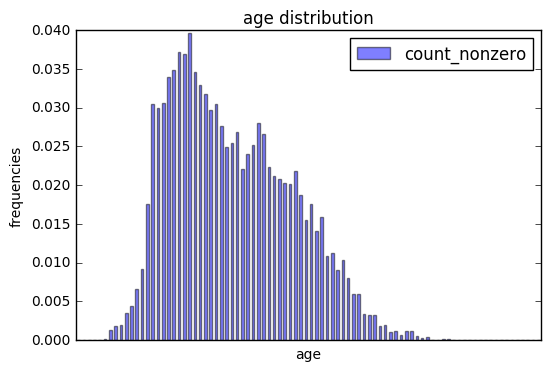

In [10]:
agenorm.plot(kind="bar", alpha=0.5)
pl.xticks([])
pl.title("age distribution")
pl.ylabel("frequencies")

Try to see if the curve really looks like a gaussian, and fit a best model to it

In [11]:
def gaufunc(x, miu, sigma, t):
    a = -(x-miu)**2/(2*sigma**2)
    return t*exp(a)

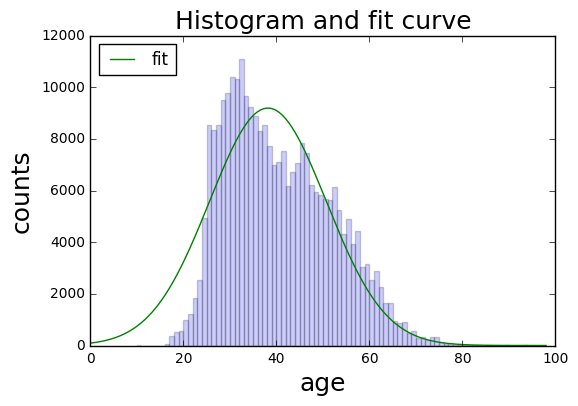

In [12]:
(n,bins,patches) = pl.hist(df.age,bins,alpha = 0.2)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(0, bins[-1], 10000)
popt, pcov = curve_fit(gaufunc, x_lin, n, p0 = [30, 1, 10])
y = gaufunc(x_space, *popt)
pl.xlabel('age', fontsize = 18)
pl.ylabel('counts', fontsize = 18)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Histogram and fit curve',fontsize = 18)

In [13]:
print "best model mean is: {}".format(popt[0])
print "best deviation is: {}".format(popt[1])

best model mean is: 38.1809465928
best deviation is: 12.5677281746


# First test: KS test

## Null Hypothesis: 

$H_0$:Age distribution is drawn from gaussian distribution with the same mean and standard deviation

## Aternative Hypothesis:

$H_a$:Age distribution is not from the gaussian distribution

Significance level $\alpha$=0.05 will be used

In [18]:
kstest(df.age, "norm", args=(38.18092624,12.56775317))

KstestResult(statistic=0.10070151561752338, pvalue=0.0)

### p-value is so small, meaning rejecting the null hypothesis, thus age distribution is not from this gaussian distribution

# Second test: Anderson Darling test

## Null Hypothesis: 

$H_0$:Age distribution is drawn from gaussian distribution 

## Aternative Hypothesis:

$H_a$:Age distribution is different from gaussian distribution

Significance level $\alpha$=0.05 will be used

In [19]:
from scipy.stats import anderson
anderson(df.age, 'norm')

AndersonResult(statistic=2732.9753468561685, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

### Anderson Result is so large, the null hypothesis is rejected so the age distribution is not drawn from gaussian

# Second hypothesis distribution: logistic distribution

## KS test
## Null Hypothesis: 

$H_0$:Age distribution is drawn from logistic with certain mean and standard deviation

## Aternative Hypothesis:

$H_a$:Age distribution is not from logistic distribution

Significance level $\alpha$=0.05 will be used

In [20]:
def logistic(x, miu, s, a):
    expo = exp(-(x-miu)/s)
    temp = (1 + expo)**2
    return a*expo/(s*temp)

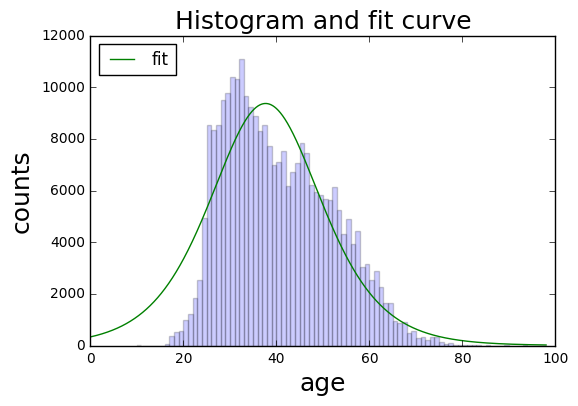

In [21]:
(n,bins,patches) = pl.hist(df.age, bins, alpha = 0.2)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(0, bins[-1], 10000)
popt, pcov = curve_fit(logistic, x_lin, n, p0 = [40, 3.6, 10])
y = logistic(x_space, *popt)
pl.xlabel('age', fontsize = 18)
pl.ylabel('counts', fontsize = 18)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Histogram and fit curve',fontsize = 18)

In [22]:
popt

array([  3.76788565e+01,   8.00315320e+00,   2.99917575e+05])

In [23]:
print "best model mean is: {}".format(popt[0])
print "best model deviation is: {}".format(popt[1])

best model mean is: 37.6788564673
best model deviation is: 8.00315320399


In [24]:
kstest(df.age, "logistic", args=(popt[0],popt[1]))

KstestResult(statistic=0.12438682512307672, pvalue=0.0)

### p-value is so small, meaning rejecting the null hypothesis, thus age distribution is not from this logistic distribution

## AD test
## Null Hypothesis: 

$H_0$:Age distribution is drawn from logistic distribution

## Aternative Hypothesis:

$H_a$:Age distribution is not from logistic distribution

Significance level $\alpha$=0.05 will be used

In [25]:
from scipy.stats import anderson
anderson(df.age, 'logistic')

AndersonResult(statistic=2893.1871237001615, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

### Anderson Result is so large, the null hypothesis is rejected so the age distribution is not drawn from logistic distribution

### Extra credit

Manhatton:
North Latitude: 40.882214 South Latitude: 40.680396 East Longitude: -73.907000 West Longitude: -74.047285

Bronx: 
North Latitude: 40.915255 South Latitude: 40.785743 East Longitude: -73.765274 West Longitude: -73.933406

Lower manhatton:
North Latitude: 40.742526 South Latitude: 40.700463 East Longitude: -73.971645 West Longitude: -74.019335

Upper Manhatton:
North Latitude: 40.878220 South Latitude: 40.782784 East Longitude: -73.910646 West Longitude: -73.971190

Brooklyn:
North Latitude: 40.739446 South Latitude: 40.551042 East Longitude: -73.833365 West Longitude: -74.056630

Queen:
North Latitude: 40.800760 South Latitude: 40.542979 East Longitude: -73.700272 West Longitude: -73.962616

Staten island:
North Latitude: 40.651812 South Latitude: 40.477399 East Longitude: -74.034547 West Longitude: -74.259090

In [31]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,age
0,1346,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,1960.0,2,55.0
1,363,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,1963.0,1,52.0
2,346,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,1974.0,1,41.0
3,182,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,1969.0,1,46.0
4,969,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,1977.0,1,38.0


In [34]:
dfloc = df[["start station latitude", "start station longitude", "age"]]

In [36]:
dfloc.columns=["lat", "lon", 'age']

In [37]:
dfloc.head()

,lat,lon,age
0,40.750020,-73.969053,55.0
1,40.743174,-74.003664,52.0
2,40.740964,-73.986022,41.0
3,40.683178,-73.965964,46.0
4,40.745168,-73.986831,38.0


In [108]:
borrough = {"Bronx":{"nlat":40.915255,"slat":40.785743,"elon":-73.765274,"wlon":-73.933406}, 
            "LowMan":{"nlat":40.742526,"slat":40.700463,"elon":-73.971645,"wlon":-74.019335},
            'UpMan':{"nlat":40.878220,"slat":40.782784,"elon":-73.910646,"wlon":-73.971190},
            "Queens":{"nlat":40.739446,"slat":40.551042,"elon":-73.833365,"wlon": -74.056630},
            "Bruk":{"nlat":40.800760,"slat":40.542979,"elon":-73.700272,"wlon":-73.962616},
            "StaIs":{"nlat":40.651812,"slat":40.477399,"elon":-74.034547,"wlon":-74.259090}}

In [109]:
def mapfunc(loc):
    for keys, location in borrough.iteritems():
        if (loc[0] > location["slat"]) & (loc[0] < location["nlat"]) & (loc[1] >  location["wlon"]) & (loc[1] < location["elon"]):
            return keys
            break

In [80]:
dfloc.loc[0]

lat    40.750020
lon   -73.969053
age    55.000000
Name: 0, dtype: float64

In [86]:
mapfunc(dfloc.loc[5])

'manhatton'

In [110]:
dfloc["borrough"] = dfloc.apply(mapfunc, axis=1)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [115]:
dfloc.borrough.fillna("Manhatton", inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [117]:
dfloc.borrough.value_counts()

LowMan       151826
Manhatton    112100
Queens        13272
Bruk           2726
Name: borrough, dtype: int64

### only in downtown manhatton, queens, brooklyn,and other place in manhatton

In [118]:
dfMan = dfloc[dfloc.borrough=="Manhatton"]
dfLM = dfloc[dfloc.borrough=="LowMan"]
dfQ = dfloc[dfloc.borrough=="Queens"]
dfBk = dfloc[dfloc.borrough=="Bruk"]

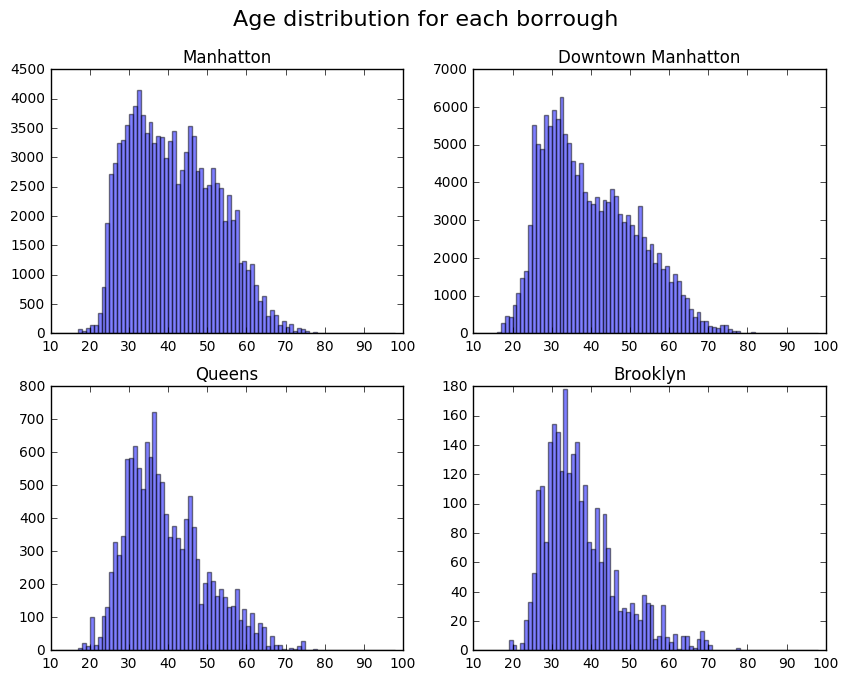

In [131]:
fig = pl.figure(figsize=(10,7.5))
fig.suptitle("Age distribution for each borrough", fontsize=16)
ax = plt.subplot("221")
ax.set_title("Manhatton")
ax.hist(dfMan.age, bins, alpha=0.5)

ax = plt.subplot("222")
ax.set_title("Downtown Manhatton")
ax.hist(dfLM.age, bins, alpha=0.5)

ax = plt.subplot("223")
ax.set_title("Queens")
ax.hist(dfQ.age, bins, alpha=0.5)

ax = plt.subplot("224")
ax.set_title("Brooklyn")
ax.hist(dfBk.age, bins, alpha=0.5)
pl.show()

## As is shown in the figure, except for manhatton, other borroughs have less portion of people above age 40 riding bikes, and the shapes seem to be closer to poisson distribution. 